In [ ]:
import os
import cv2
import numpy as np
from skimage.feature import hog
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm




In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("meowmeowmeowmeowmeow/gtsrb-german-traffic-sign")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/gtsrb-german-traffic-sign


In [ ]:
data_dir = "/kaggle/input/gtsrb-german-traffic-sign/Train"
features = []
images = []
labels = []

for class_id in tqdm(os.listdir(data_dir)):
    class_path = os.path.join(data_dir, class_id)
    if not os.path.isdir(class_path):
        continue
    for img_name in os.listdir(class_path):
        img_path = os.path.join(class_path, img_name)
        img = cv2.imread(img_path)
        img = cv2.resize(img, (32, 32))
        gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        hog_feat = hog(gray, orientations=9, pixels_per_cell=(8, 8),
                       cells_per_block=(2, 2), block_norm='L2-Hys')
        features.append(hog_feat)
        images.append(img)  # GÖRSELİ KAYDET!
        labels.append(int(class_id))

X = np.array(features)
y = np.array(labels)
images = np.array(images)



100%|██████████| 43/43 [01:28<00:00,  2.06s/it]


In [ ]:
#eğitim ve test olarak ayırdık
X_train, X_test, y_train, y_test, img_train, img_test = train_test_split(
    X, y, images, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [ ]:

# SVM modelini eğitiyoruz
svm = LinearSVC(max_iter=10000)
svm.fit(X_train, y_train)



LinearSVC(max_iter=10000)

In [ ]:
#tahmin yap
y_pred = svm.predict(X_test)



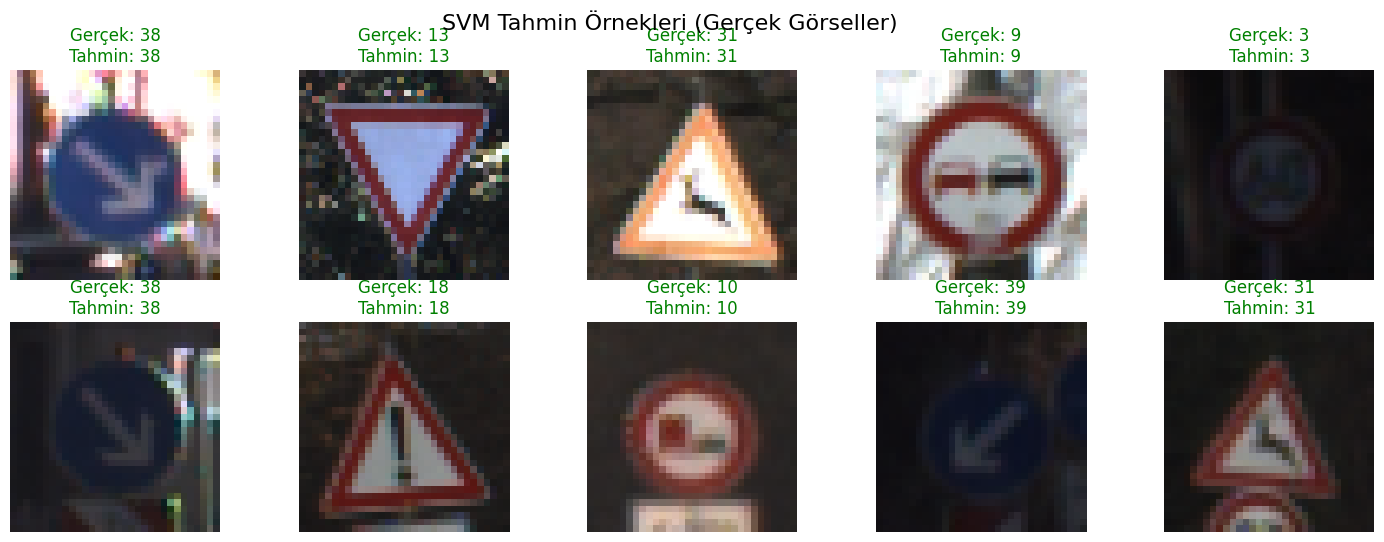

In [ ]:
import random

plt.figure(figsize=(18, 6))
for i in range(10):
    idx = random.randint(0, len(img_test) - 1)
    img = img_test[idx]
    true = y_test[idx]
    pred = y_pred[idx]

    plt.subplot(2, 5, i+1)
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.title(f"Gerçek: {true}\nTahmin: {pred}", color='green' if true == pred else 'red')
    plt.axis('off')

plt.suptitle("SVM Tahmin Örnekleri (Gerçek Görseller)", fontsize=16)
plt.show()


In [ ]:
#performans analizi
from sklearn.metrics import classification_report

print("📊 Sınıflandırma Raporu:\n")
print(classification_report(y_test, y_pred, digits=3))



📊 Sınıflandırma Raporu:

              precision    recall  f1-score   support

           0      0.711     0.780     0.744        41
           1      0.764     0.750     0.757       444
           2      0.767     0.757     0.762       444
           3      0.839     0.797     0.817       295
           4      0.908     0.949     0.928       396
           5      0.716     0.657     0.685       338
           6      0.956     1.000     0.978        87
           7      0.858     0.880     0.869       324
           8      0.749     0.712     0.730       260
           9      0.849     0.883     0.866       274
          10      0.933     0.942     0.938       417
          11      0.790     0.818     0.804       258
          12      0.980     0.985     0.982       453
          13      0.991     0.995     0.993       431
          14      0.970     0.964     0.967       165
          15      0.940     0.940     0.940       134
          16      0.972     0.958     0.965        72
  

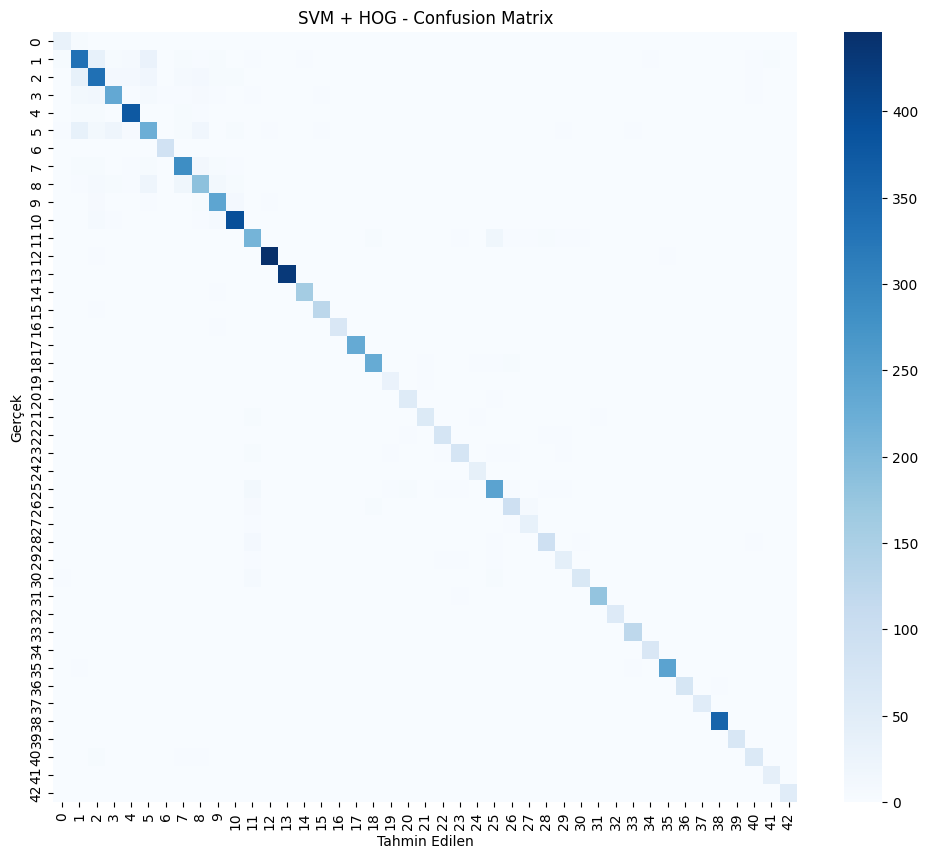

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(12, 10))
sns.heatmap(cm, cmap='Blues', xticklabels=True, yticklabels=True, annot=False)
plt.title("SVM + HOG - Confusion Matrix")
plt.xlabel("Tahmin Edilen")
plt.ylabel("Gerçek")
plt.show()


In [ ]:
from sklearn.metrics import accuracy_score

acc = accuracy_score(y_test, y_pred)
print(f"✅ Genel Doğruluk: %{acc * 100:.2f}")


✅ Genel Doğruluk: %88.29
